# Preprocessing step: Creating The Input for Generating Paper Results

In the realm of mineral exploration and mining, the exploration-discovery-mining (EDM) cycle can often span a significant duration of 10 to 13 years. As the demand for mineral resources in the global market continues to rise, the need for innovative approaches that expedite the EDM cycle becomes paramount. Our paper proposes a groundbreaking methodology aimed at accelerating this cycle by facilitating confidentiality-preserving sharing of minerals data. This approach has the potential to notably condense the exploration and discovery phases.

The core challenge lies in ensuring the trustworthy sharing of data, which is vital for optimizing decision-making within mineral exploration companies and streamlining the efficiency of their exploration programs. However, achieving data sharing while upholding confidentiality and competitive advantages presents a complex task. Balancing these multifaceted aspects is crucial.

This notebook plays a pivotal role in the process. Here, we delve into the creation of a pivotal input file that fuels the generation of paper results. Through meticulous explanation, we will demonstrate the methodology used to construct this input file, utilizing the valuable insights provided by the mineral team.




## Read files

This function takes a 'path' parameter and reads multiple shapefiles and an Excel file based on the specified paths. It returns a dictionary of dataframes, each corresponding to a specific shapefile or sheet within the Excel file. The code also handles different encodings for reading the shapefiles and performs error handling in case the specified encoding fails.

The following files are used :

* Western Australia State Interpreted Bedrock Geology:

Source: This dataset can be accessed at https://catalogue.data.wa.gov.au/dataset/1-500-000-state-interpreted-bedrock-geology-dmirs-016.
Purpose: It provides a comprehensive interpretation of the state's bedrock geology at a 1:500,000 scale.
Utilization: The function employs this data for analysis within the context of the larger project.

* Tenements List with Size and Coordinates:

Content: This file contains a compilation of tenements, including their respective sizes and coordinates.
Importance: It plays a crucial role in understanding land tenure and resource distribution within the study area.
Integration: The function incorporates this data to enhance the overall dataset's depth and accuracy.

* Study Area Surface Auger Sampling:

Scope: This dataset pertains to Geochemical samples from the near-surface auger measurements data: Ni anomalies, Cu anomalies, and Cr298
anomalies
Significance: It offers insights into soil composition and mineral content, contributing to the project's geological assessment.
Inclusion: The function integrates this dataset to encompass a comprehensive overview of the study area's geological characteristics.



### !!! Due to concerns regarding confidentiality, we are unable to provide access to the final two files: the tenement list and Auger Sampling.

In [1]:
import warnings
import numpy as np
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
np.warnings.filterwarnings('ignore')
import sys

sys.path.append('..')
from minerals import *

path = '..'

l=5

df = read_files(path)


The create_grid_dataframe function is responsible for linking multiple files together to create a grid of cells. This grid is generated using the tenements map and is defined by a specified side_len. Each cell in the grid contains coordinates, geology characteristics such as 'mafic', 'komatiite', and others, as well as information about various chemical properties like 'Cr', 'Cu', and 'Ni'. 

The function performs the following steps:

* Adds 'coords_x' and 'coords_y' columns to the 'sampling' DataFrame.
* Determines the minimum and maximum x and y coordinates.
* Creates an empty DataFrame to store the grid data.
* Iterates through x and y coordinates to generate grid cells, storing their coordinates and central point.
* Connects grid cells to corresponding tenements using the connect_grid_totenement function.
* Associates each grid cell with geology and chemistry points through the connect_grid_togeology_and_chemistry_points function.
* Calculates the closest geology and chemistry characteristics for each cell.
* Calculates weights for each cell based on geology and chemistry characteristics using the specified formula.

## Next, I am constructing a grid with a side length of 10.

In [2]:
side_len = 10
df_minerals_grid = create_grid_dataframe(df,side_len)


100it [00:00, 111.97it/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [11:18<00:00,  6.78s/it]
100it [00:00, 533.53it/s]
100it [07:45,  4.66s/it]
100it [00:00, 3695.06it/s]


100it [00:00, 214.64it/s]


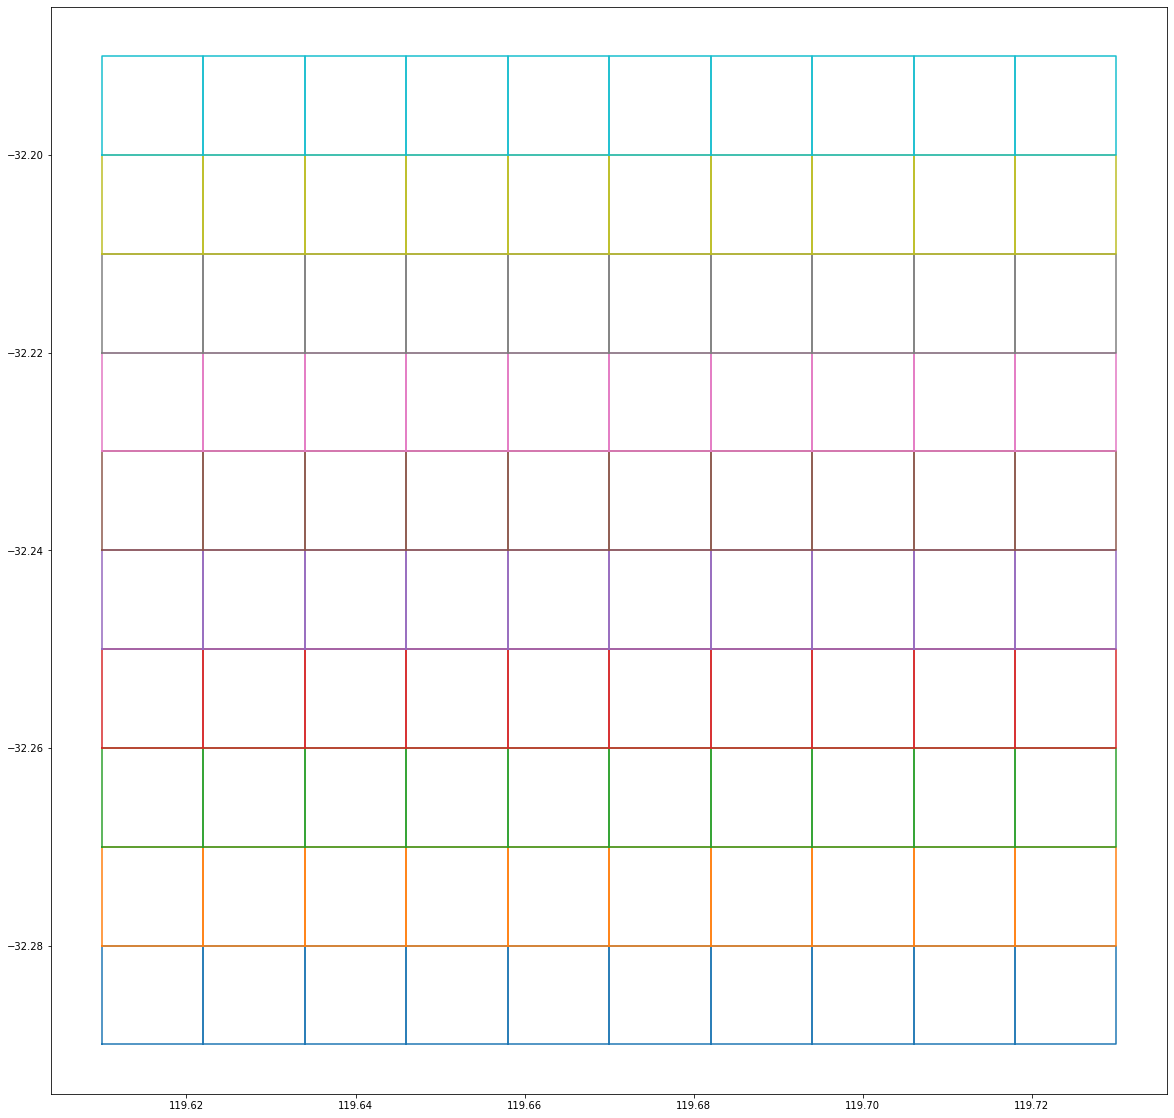

In [4]:
f, ax = plt.subplots(1, 1, figsize=(20, 20))
for id, cell in tqdm(df_minerals_grid.iterrows()):
    polygon_cell = Polygon(cell.coords)
    x, y = polygon_cell.exterior.xy
    ax.plot(x, y)
plt.show()

df_minerals_gridThe execution time of the create_grid_dataframe function can vary significantly based on the size of the grid. This led to the decision of creating the grid DataFrame once, as it can be time-consuming. Subsequent results and analysis in the paper are derived directly from this pre-generated DataFrame. This approach allows for faster extraction of various results without repeatedly reconstructing the grid structure.

In [17]:
df_minerals_grid_saved = df_minerals_grid.copy() 


##  Illustration of the different exploration and mining tenements

In [ ]:

from random import randint

list_tenements = []
for i in  df_minerals_grid.tenements.tolist():
    a =list(np.unique(eval(i)   ))
    
    list_tenements.append(a)
df_minerals_grid.tenements = list_tenements

In [19]:

# Initialize an empty list 'a' to store tenement colors for each coordinate pair
a = []

# Iterate through unique y-coordinates
for y in sorted(np.unique(df_minerals_grid3.coords_y.tolist())):
    ll = []
    # Iterate through unique x-coordinates
    for x in sorted(np.unique(df_minerals_grid3.coords_x.tolist())):
        # Append tenement color index to the list
        ll.append(df_minerals_grid3[(df_minerals_grid3.coords_y == y) & (df_minerals_grid3.coords_x == x)]['tenements_color'].values[0])
    # Add the row to the main list
    a.append(ll)

[Text(0, 0.0, '-32.28'),
 Text(0, 2.0, '-32.28'),
 Text(0, 4.0, '-32.26'),
 Text(0, 6.0, '-32.26'),
 Text(0, 8.0, '-32.25'),
 Text(0, 10.0, '-32.24')]

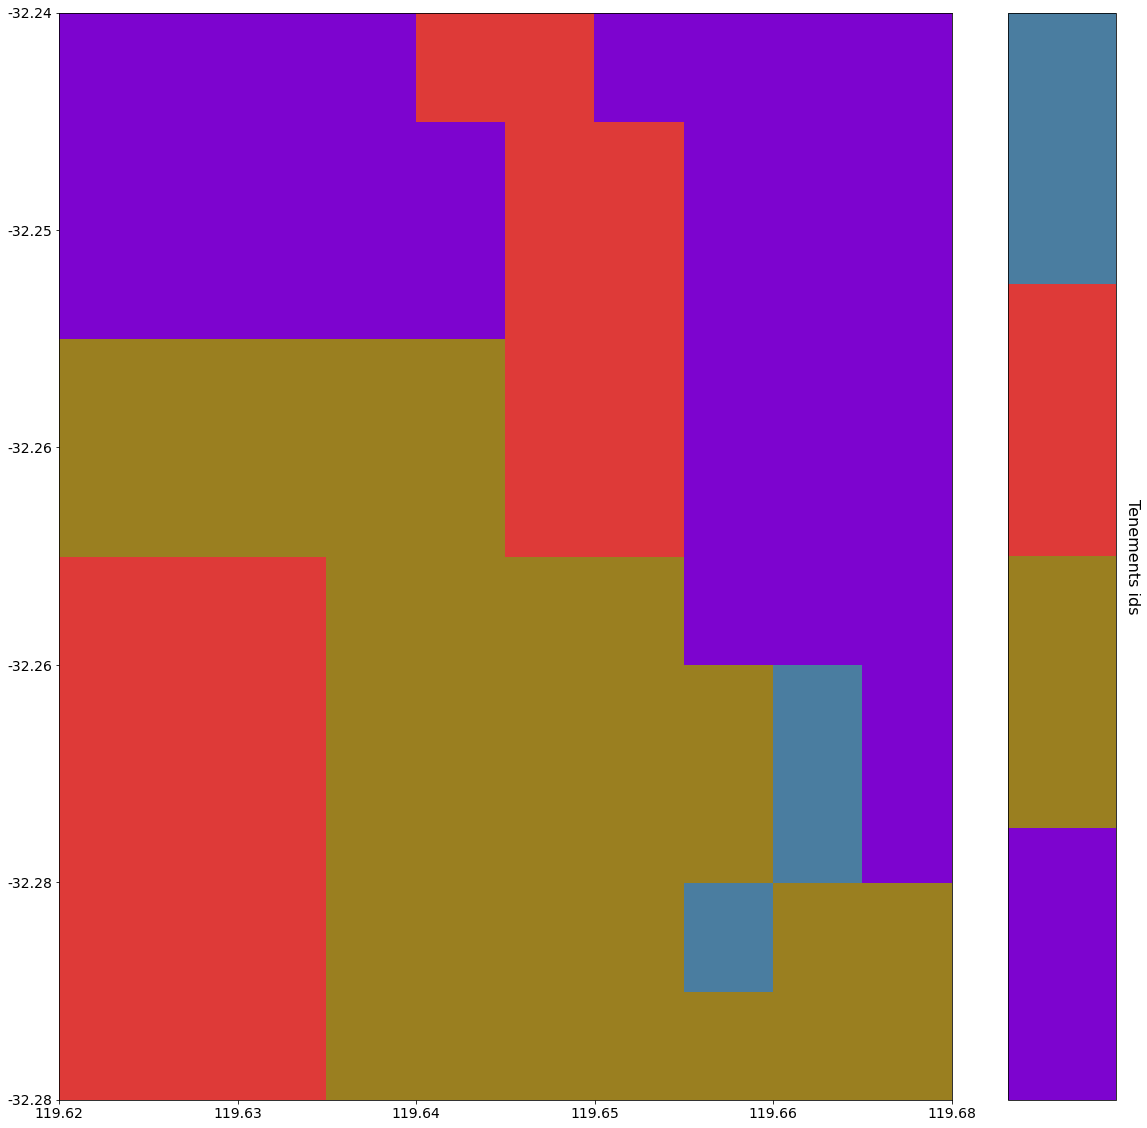

In [21]:


# Create a new figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

# Create a heatmap of tenement colors
plt.pcolor(a, cmap=cMap)

# Create a colorbar
cbar = plt.colorbar(plt.pcolor(a, cmap=cMap), aspect=10)
cbar.set_ticks(list())
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('Tenements ids', rotation=270, fontsize=16)

# Add labels for tenement IDs on the colorbar
for index, label in enumerate(list_tenements):
    x = 0.15
    y = index * 28 / 15 / 2 + 0.2
    cbar.ax.text(x, y, label, fontsize=15, color='white')

# Set x and y tick labels
ax.set_xticklabels([round(x, 2) for x in np.unique(df_minerals_grid3.coords_x.tolist())], fontsize=14)
ax.set_yticklabels([round(x, 2) for x in np.unique(df_minerals_grid3.coords_y.tolist())], rotation='horizontal', fontsize=14)


## The selected tenements for constructing the three cases

[Text(0, 0.0, '-32.28'),
 Text(0, 2.0, '-32.28'),
 Text(0, 4.0, '-32.26'),
 Text(0, 6.0, '-32.26'),
 Text(0, 8.0, '-32.25'),
 Text(0, 10.0, '-32.24')]

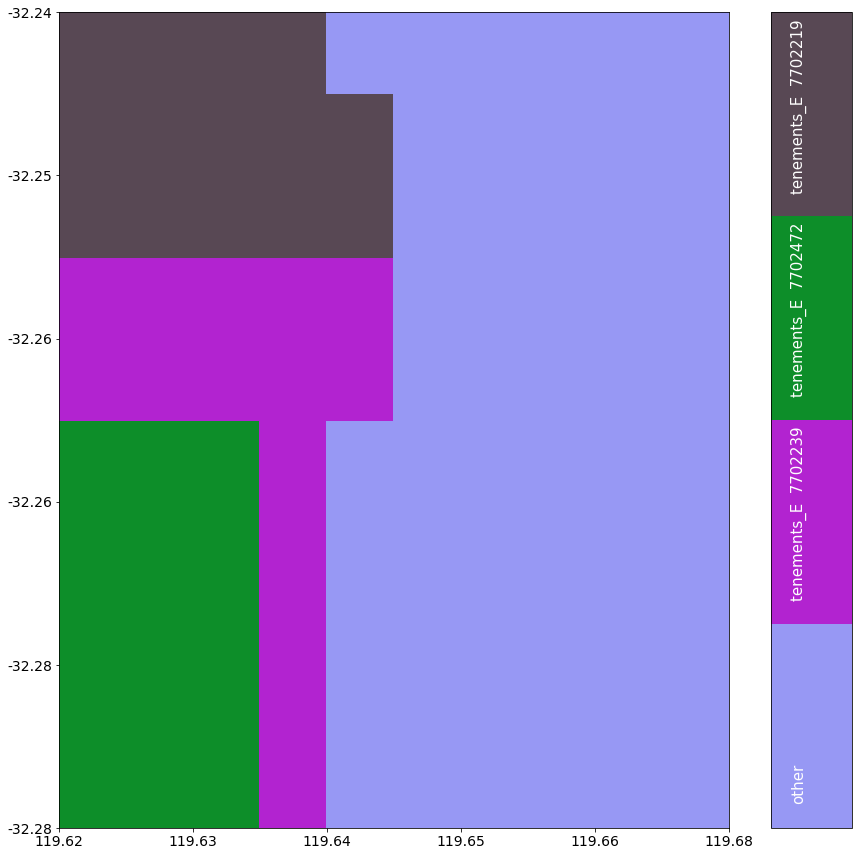

In [22]:

# Creating columns with boolean values indicating the presence of specific tenements
df_minerals_grid['tenements_E  7702239'] = ['E  7702239' == x[0] for x in df_minerals_grid.tenements]
df_minerals_grid['tenements_E  7702239'] = df_minerals_grid['tenements_E  7702239'].astype(int)

df_minerals_grid['tenements_E  7702472'] = ['E  7702472' == x[0] for x in df_minerals_grid.tenements]
df_minerals_grid['tenements_E  7702472'] = df_minerals_grid['tenements_E  7702472'].astype(int) * 2

df_minerals_grid['tenements_E  7702219'] = ['E  7702219' == x[0] for x in df_minerals_grid.tenements]
df_minerals_grid['tenements_E  7702219'] = df_minerals_grid['tenements_E  7702219'].astype(int) * 3

# Combine the boolean columns to create a 'tenements_E' column
df_minerals_grid['tenements_E'] = df_minerals_grid['tenements_E  7702239'] + df_minerals_grid['tenements_E  7702472'] + df_minerals_grid['tenements_E  7702219']

# Initialize a list to store tenement colors for each coordinate pair
a = []

# Iterate through sorted unique y-coordinates
for y in sorted(np.unique(df_minerals_grid.coords_y.tolist())):
    ll = []
    # Iterate through sorted unique x-coordinates
    for x in sorted(np.unique(df_minerals_grid.coords_x.tolist())):
        # Append tenement color value to the list
        ll.append(df_minerals_grid[(df_minerals_grid.coords_x == x) & (df_minerals_grid.coords_y == y)]['tenements_E'].values[0])
    # Add the row to the main list
    a.append(ll)

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(15, 15))

# Create a custom colormap with random colors for tenements
cMap = ListedColormap(['#%06X' % randint(0, 0xFFFFFF) for i in range(4)])

# Create a heatmap of tenement colors
plt.pcolor(a, cmap=cMap)

# Create a colorbar
cbar = plt.colorbar(plt.pcolor(a, cmap=cMap), aspect=10)
cbar.set_ticks(list())

# Loop to label the colorbar with tenement information
labels = ['other', 'tenements_E  7702239', 'tenements_E  7702472', 'tenements_E  7702219']
for index in range(4):
    x = 0.25
    y = index * 7.5 / 10 + 0.1
    cbar.ax.text(x, y, labels[index], rotation='vertical', fontsize=15, color='white')

# Set x and y tick labels
ax.set_xticklabels([round(x, 2) for x in np.unique(df_minerals_grid.coords_x.tolist())], fontsize=14)
ax.set_yticklabels([round(x, 2) for x in np.unique(df_minerals_grid.coords_y.tolist())], rotation='horizontal', fontsize=14)



## Connect sampling to tenement and to grid

In [25]:
path = '..'
df_sampling_tenement_v1 = connect_grid_totenement( df,df_minerals_grid)

df = read_files(path)
df_sampling_tenement_v2 = connect_tenement_tosample(df)

100it [00:00, 108.02it/s]
196it [00:51,  3.79it/s]
